### Bistable wilson and cowan like model

from : https://elifesciences.org/articles/22425#fig5

In [2]:
# for fast array manipulation
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# for numerical ODE integration
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
# for nonlinear equations
from scipy.optimize import fsolve
# to display plots in-line
%matplotlib inline
plt.style.use('ggplot')

In [3]:
def sigmoid(x, a, thr):
    return 1 / (1 + np.exp(-a * (x - thr)))

def threshold_linear(x,thr,gain):
    thresholded = x-thr
    if thresholded > 0:
        return gain*thresholded
    else:
        return 0 
    
vthreshold_linear = np.vectorize(threshold_linear)

In [4]:
# Time constant of neural pop in seconds
tau_e = 0.010
tau_i = 0.002
tau_a = 0.5
# Synapse strength
j_ee = 5
j_ei = 2
j_ie = 10
j_ii = 0.5
# Adaptation parameter
beta = 6
tau_a = 0.5
# threshold and gains
g_e = 1
g_i = 4
thr_i = 25
thr_e = 3 # to play with
# Input currents
I_e = 6
# I_e-thr_e = 3 which is equivalent to taking I_e = 0 and thr_e = -3 as in the paper



In [5]:
# this function returns the right hand side of the Wilson-Cowan equation
# (both, in a 2-vector)
def rate_model(t, y):
    E = y[0]
    I = y[1]
    A = y[2]
    E2 = y[3]
    A2 = y[4]
    I2 = y[5]

    y1 = (-E + vthreshold_linear(j_ee*E-j_ei*I-j_ei*I2-A+I_e,thr_e, g_e))/tau_e
    y2 = (-I + vthreshold_linear(j_ie*E-j_ii*I,thr_i,g_i))/tau_i
    y3 = (-A + beta*E)/tau_a
    y4 = (-E2 + vthreshold_linear(j_ee*E2-j_ei*I-j_ei*I2-A2+I_e,thr_e, g_e))/tau_e
    y5 = (-A2 + beta*E2)/tau_a
    y6 = (-I2 + vthreshold_linear(j_ie*E2-j_ii*I2,thr_i,g_i))/tau_i

    return [y1, y2, y3, y4, y5, y6]


In [6]:
# minimum and maximum E and I values we want displayed in the graph
# minval = -.1
# maxval = 20
# resolution = 50
# # State variables
# x1 = np.linspace(minval, maxval, resolution)
# x2 = np.linspace(minval, maxval, resolution)
# x3 = np.linspace(minval, maxval, resolution)
# x4 = np.linspace(minval, maxval, resolution)
# x5 = np.linspace(minval, maxval, resolution)
# Create a grid for evaluation of the vector field
# x1, x2, x3, x4, x5 = np.meshgrid(x1, x2)
# # Evaluate the slopes
# X1, X2 = rate_model([x1, x2], 0)
# # Compute the magnitude vector
# M = np.hypot(X1, X2)
# Normalize the slopes vectors (for the field plot)
#X1, X2 = X1/M, X2/M

In [7]:
# fixed_p = []
# y1 = x1.ravel()
# y2 = x2.ravel()
# y3 = x3.ravel()
# for i in range(resolution**2):
#     # find a zero
#     sol, infodict, ier, mesg = fsolve(rate_model,
#                                       [y1[i], y2[i],y3[i]],
#                                       args=(0),
#                                       full_output=1)
#     if ier == 1: # I exclude the cases where fsolve didn't converge
#         fixed_p.append(sol)

# fixed_p = np.array(fixed_p).T


In [17]:
# simulation duration and step size
time = np.linspace(0, 40, 4000)

# starting point, hopefully inside the basin of attraction of our attractor
E0, I0, A0, E10, A10, I10 = 0, 0, 0, 0, 0, 0 # try changing this

# find the solution with scint.odeint
#odesol = odeint(rate_model, [E0, I0, A0, E10, A10, I10], time)
odesol = solve_ivp(rate_model,[0,40] ,[E0, I0, A0, E10, A10, I10],'BDF')

# separate the two solutions
exc_timeseries, inh_timeseries, a_timeseries, exc1_timeseries, a1_timeseries, inh1_timeseries = odesol.y


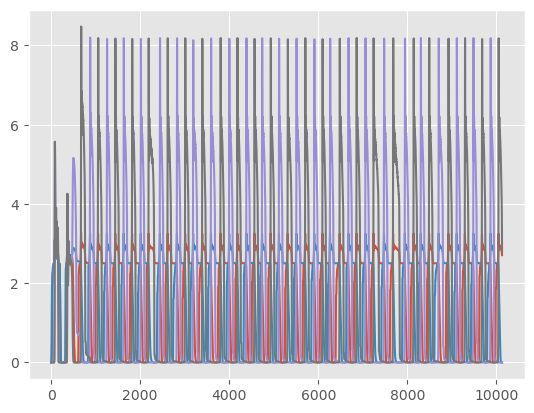

In [19]:
plt.plot(exc_timeseries);
plt.plot(exc1_timeseries);
plt.plot(inh1_timeseries);
plt.plot(inh_timeseries);

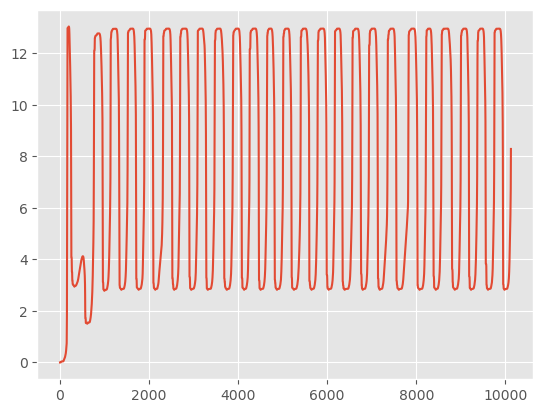

In [20]:
plt.plot(a_timeseries)

In [11]:
# # plotting the vector field in the state space (E, I)
# plt.figure(figsize=(10, 10))
# #plt.quiver(x2[:,:,49], x1[:,:,49], X2[:,:,49], X1[:,:,49], pivot='mid', alpha=.5)
# plt.xlim([minval, maxval])
# plt.ylim([minval, maxval])
# plt.xlabel(r'$I$', fontsize=16) # yes, you can use Latex code!
# plt.ylabel(r'$E$', fontsize=16)
# plt.grid()

# # plot the solution in the state space
# plt.plot(inh_timeseries, exc_timeseries, '.-');

# # plot the fixed points we identified
# plt.scatter(fixed_p[1], fixed_p[0], marker='o', c='k', s=50,
#             label="Stationary points")

# # plot the starting point
# plt.scatter(I0, E0, marker='*', c='r', s=300, label="Starting point")
# plt.legend(loc="upper left")

# # plot the solution in time
# plt.figure(figsize=(10.3,3))
# plt.ylabel(r'$E, I$')
# plt.xlabel(r'$t$')
# plt.plot(time, exc_timeseries, '.-', label="excitatory");
# plt.plot(time, inh_timeseries, '.-', label="inhibitory");
# plt.legend();